# Sample testing of regression metrics


In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from confidenceinterval import MetricEvaluator 
import xgboost as xgb

In [2]:
house_prices = pd.read_csv('../datasets/housing.csv')

house_prices.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
house_prices.shape

(4600, 18)

In [4]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
house_prices.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

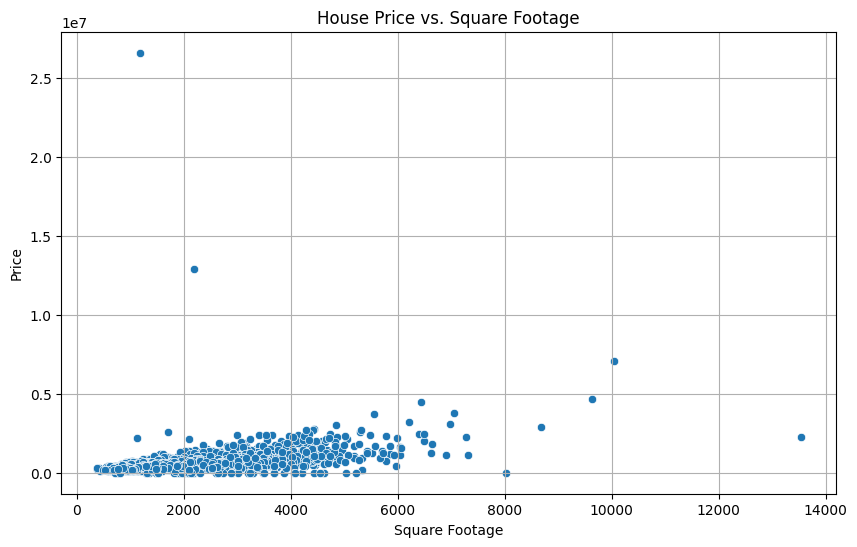

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=house_prices)
plt.title('House Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.grid(True)
plt.show()

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

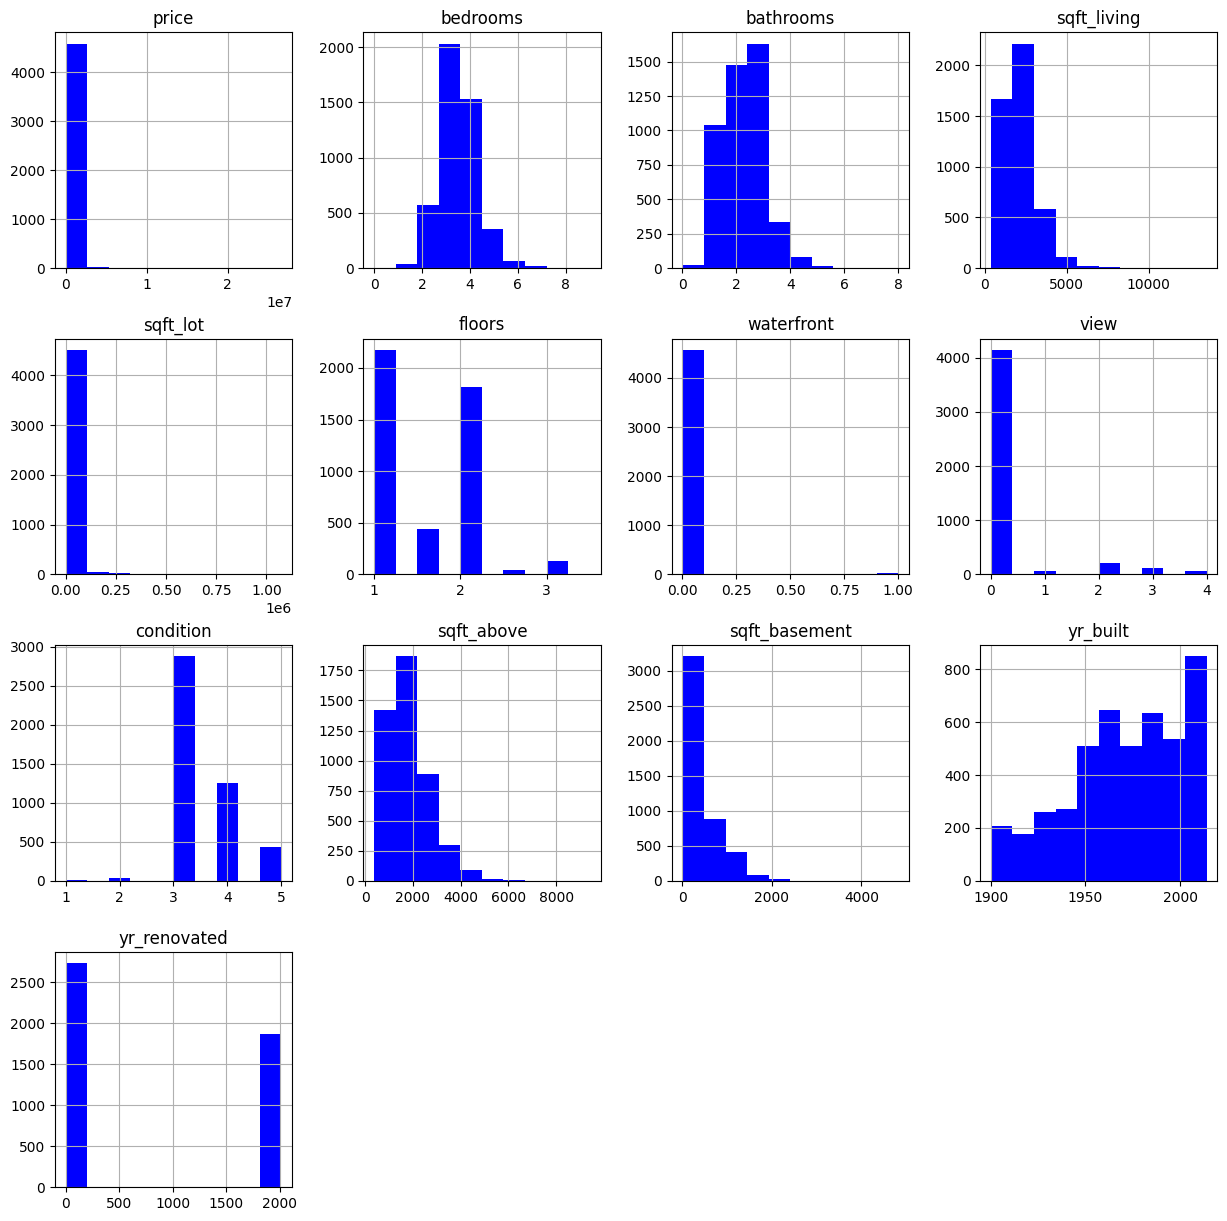

In [7]:
house_prices.hist(figsize=(15, 15), xlabelsize=10, ylabelsize=10, color='blue')

In [8]:
df1 = house_prices.drop(['date', 'city', 'statezip', 'country', 'street'], axis = 'columns')
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


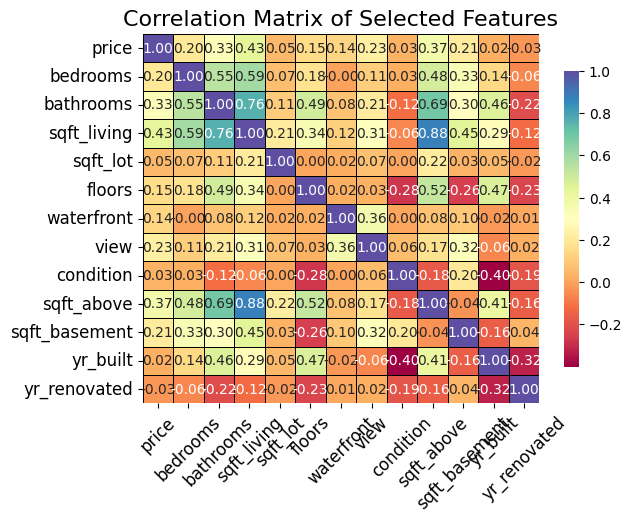

In [9]:
corr_matrix = df1.corr(method='pearson')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Spectral', cbar_kws={'shrink': .8}, 
            linewidths=0.5, linecolor='black', annot_kws={"size": 10})

# Customize the plot
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Correlation Matrix of Selected Features', fontsize=16)
plt.show()

In [10]:
df2 = corr_matrix.index[abs(corr_matrix['price']) > 0.3].to_list()
df2.remove('price')
print(df2)

['bathrooms', 'sqft_living', 'sqft_above']


In [11]:
y = house_prices['price']
x = house_prices[df2]
scaler = StandardScaler()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
len(x_train)

4140

In [13]:
len(x_test)

460

# XGBoost and Linear Regression Analysis 


In [14]:
evaluate = MetricEvaluator()

n_experiments = 100
metrics = ['r2', 'mse', 'mae', 'rmse', 'iou']

lr_coverage_counts = {metric: 0 for metric in metrics}
xgb_coverage_counts = {metric: 0 for metric in metrics}

for experiment in range(n_experiments):
    # Split data: 50% train, 10% test, 40% validation
    x_train_exp, x_temp, y_train_exp, y_temp = train_test_split(x, y, test_size=0.5, random_state=experiment)
    x_test_exp, x_val_exp, y_test_exp, y_val_exp = train_test_split(x_temp, y_temp, test_size=0.8, random_state=experiment)
    
    # Scale data for Linear Regression
    scaler_exp = StandardScaler()
    x_train_scaled = scaler_exp.fit_transform(x_train_exp)
    x_test_scaled = scaler_exp.transform(x_test_exp)
    x_val_scaled = scaler_exp.transform(x_val_exp)
    
    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(x_train_scaled, y_train_exp)
    y_test_pred_lr = lr_model.predict(x_test_scaled)
    y_val_pred_lr = lr_model.predict(x_val_scaled)
    
    # XGBoost
    xgb_model = xgb.XGBRegressor(
        objective='reg:linear',
        booster='gblinear',
        n_estimators=100,
        learning_rate=0.1,
        random_state=experiment
    )
    
    xgb_model.fit(x_train_exp, y_train_exp)
    y_test_pred_xgb = xgb_model.predict(x_test_exp)
    y_val_pred_xgb = xgb_model.predict(x_val_exp)
    
    # Test all metrics
    for metric in metrics:
        # Linear Regression
        lr_result = evaluate.evaluate(y_true=y_test_exp, y_pred=y_test_pred_lr, task='regression', metric=metric)
        lr_test_value, (lr_ci_lower, lr_ci_upper) = lr_result
        
        if metric == 'r2':
             lr_val_value = evaluate.r2_score(y_val_exp, y_val_pred_lr, compute_ci=False)
        elif metric == 'mse':
            lr_val_value = evaluate.mse(y_val_exp, y_val_pred_lr, compute_ci=False)
        elif metric == 'mae':
            lr_val_value = evaluate.mae(y_val_exp, y_val_pred_lr, compute_ci=False)
        elif metric == 'rmse':
            lr_val_value = evaluate.rmse(y_val_exp, y_val_pred_lr, compute_ci=False)
        
        if lr_ci_lower <= lr_val_value <= lr_ci_upper:
            lr_coverage_counts[metric] += 1
        
        # XGBoost
        xgb_result = evaluate.evaluate(y_true=y_test_exp, y_pred=y_test_pred_xgb, task='regression', metric=metric)
        xgb_test_value, (xgb_ci_lower, xgb_ci_upper) = xgb_result
        
        if metric == 'r2':
            xgb_val_value = evaluate.r2_score(y_val_exp, y_val_pred_xgb, compute_ci=False)
        elif metric == 'mse':
            xgb_val_value = evaluate.mse(y_val_exp, y_val_pred_xgb, compute_ci=False)
        elif metric == 'mae':
            xgb_val_value = evaluate.mae(y_val_exp, y_val_pred_xgb, compute_ci=False)
        elif metric == 'rmse':
            xgb_val_value = evaluate.rmse(y_val_exp, y_val_pred_xgb, compute_ci=False)
        elif metric == 'iou':
            xgb_val_value = evaluate.iou(y_val_exp, y_val_pred_xgb, compute_ci=False)
        
        if xgb_ci_lower <= xgb_val_value <= xgb_ci_upper:
            xgb_coverage_counts[metric] += 1

for metric in metrics:
    lr_coverage_rate = (lr_coverage_counts[metric] / n_experiments) * 100
    xgb_coverage_rate = (xgb_coverage_counts[metric] / n_experiments) * 100
    
    print(f"{metric.upper()} - Linear Regression CI Coverage Rate: {lr_coverage_rate:.1f}%")
    print(f"{metric.upper()} - XGBoost CI Coverage Rate: {xgb_coverage_rate:.1f}%")
    print(f"{metric.upper()} - Linear Regression Success: {'Yes' if lr_coverage_rate >= 90 else 'No'}")
    print(f"{metric.upper()} - XGBoost Success: {'Yes' if xgb_coverage_rate >= 90 else 'No'}")
    print()

R2 - Linear Regression CI Coverage Rate: 45.0%
R2 - XGBoost CI Coverage Rate: 41.0%
R2 - Linear Regression Success: No
R2 - XGBoost Success: No

MSE - Linear Regression CI Coverage Rate: 36.0%
MSE - XGBoost CI Coverage Rate: 37.0%
MSE - Linear Regression Success: No
MSE - XGBoost Success: No

MAE - Linear Regression CI Coverage Rate: 78.0%
MAE - XGBoost CI Coverage Rate: 80.0%
MAE - Linear Regression Success: No
MAE - XGBoost Success: No

RMSE - Linear Regression CI Coverage Rate: 36.0%
RMSE - XGBoost CI Coverage Rate: 37.0%
RMSE - Linear Regression Success: No
RMSE - XGBoost Success: No

IOU - Linear Regression CI Coverage Rate: 0.0%
IOU - XGBoost CI Coverage Rate: 81.0%
IOU - Linear Regression Success: No
IOU - XGBoost Success: No



In [15]:
# No need to import individual metrics - use through MetricEvaluator instance

x_train_single, x_temp_single, y_train_single, y_temp_single = train_test_split(x, y, test_size=0.5, random_state=42)
x_test_single, x_val_single, y_test_single, y_val_single = train_test_split(x_temp_single, y_temp_single, test_size=0.8, random_state=42)

print(f"Train: {len(x_train_single)}")
print(f"Test: {len(x_test_single)}")
print(f"Validation: {len(x_val_single)}")

scaler_single = StandardScaler()
x_train_single_scaled = scaler_single.fit_transform(x_train_single)
x_test_single_scaled = scaler_single.transform(x_test_single)
x_val_single_scaled = scaler_single.transform(x_val_single)

Train: 2300
Test: 460
Validation: 1840


In [16]:
lr_single = LinearRegression()
lr_single.fit(x_train_single_scaled, y_train_single)
y_test_pred_lr_single = lr_single.predict(x_test_single_scaled)
y_val_pred_lr_single = lr_single.predict(x_val_single_scaled)

xgb_single = xgb.XGBRegressor(
    objective='reg:linear',
    booster='gblinear',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
xgb_single.fit(x_train_single, y_train_single)
y_test_pred_xgb_single = xgb_single.predict(x_test_single)
y_val_pred_xgb_single = xgb_single.predict(x_val_single)

In [17]:
metrics = ['r2', 'mse', 'mae', 'rmse', 'iou']

for metric in metrics:
    print(f"{metric.upper()} METRIC:")
    
    lr_result = evaluate.evaluate(y_true=y_test_single, y_pred=y_test_pred_lr_single, task='regression', metric=metric)
    lr_test_value, (lr_ci_lower, lr_ci_upper) = lr_result
    
    if metric == 'r2':
        lr_val_actual = evaluate.r2_score(y_val_single, y_val_pred_lr_single, compute_ci=False)
    elif metric == 'mse':
        lr_val_actual = evaluate.mse(y_val_single, y_val_pred_lr_single, compute_ci=False)
    elif metric == 'mae':
        lr_val_actual = evaluate.mae(y_val_single, y_val_pred_lr_single, compute_ci=False)
    elif metric == 'rmse':
        lr_val_actual = evaluate.rmse(y_val_single, y_val_pred_lr_single, compute_ci=False)
    elif metric == 'iou':
        lr_val_actual = evaluate.iou(y_val_single, y_val_pred_lr_single, compute_ci=False)
    
    print(f"Linear Regression:")
    print(f"  Test {metric}: {lr_test_value:.4f}")
    print(f"  Bootstrap CI: [{lr_ci_lower:.4f}, {lr_ci_upper:.4f}]")
    print(f"  Validation {metric}: {lr_val_actual:.4f}")
    print(f"  Contains: {lr_ci_lower <= lr_val_actual <= lr_ci_upper}")
    print()

R2 METRIC:
Linear Regression:
  Test r2: 0.4174
  Bootstrap CI: [0.2914, 0.5223]
  Validation r2: 0.0911
  Contains: False

MSE METRIC:
Linear Regression:
  Test mse: 67155318566.2159
  Bootstrap CI: [53970523672.3769, 89987008029.1963]
  Validation mse: 532104360633.9778
  Contains: False

MAE METRIC:
Linear Regression:
  Test mae: 182848.3095
  Bootstrap CI: [167674.8299, 201134.3140]
  Validation mae: 204048.2464
  Contains: False

RMSE METRIC:
Linear Regression:
  Test rmse: 259143.4324
  Bootstrap CI: [231098.8968, 298732.1852]
  Validation rmse: 729454.8380
  Contains: False

IOU METRIC:
Linear Regression:
  Test iou: 0.7112
  Bootstrap CI: [0.6910, 0.7289]
  Validation iou: 0.6905
  Contains: False



In [18]:
for metric in metrics:
    print(f"{metric.upper()} METRIC:")
    
    xgb_result = evaluate.evaluate(y_true=y_test_single, y_pred=y_test_pred_xgb_single, task='regression', metric=metric)
    xgb_test_value, (xgb_ci_lower, xgb_ci_upper) = xgb_result
    
    if metric == 'r2':
        xgb_val_actual = evaluate.r2_score(y_val_single, y_val_pred_xgb_single, compute_ci=False)
    elif metric == 'mse':
        xgb_val_actual = evaluate.mse(y_val_single, y_val_pred_xgb_single, compute_ci=False)
    elif metric == 'mae':
        xgb_val_actual = evaluate.mae(y_val_single, y_val_pred_xgb_single, compute_ci=False)
    elif metric == 'rmse':
        xgb_val_actual = evaluate.rmse(y_val_single, y_val_pred_xgb_single, compute_ci=False)
    elif metric == 'iou':
        xgb_val_actual = evaluate.iou(y_val_single, y_val_pred_xgb_single, compute_ci=False)
    
    print(f"XGBoost:")
    print(f"  Test {metric}: {xgb_test_value:.4f}")
    print(f"  Bootstrap CI: [{xgb_ci_lower:.4f}, {xgb_ci_upper:.4f}]")
    print(f"  Validation {metric}: {xgb_val_actual:.4f}")
    print(f"  Contains: {xgb_ci_lower <= xgb_val_actual <= xgb_ci_upper}")
    print()

R2 METRIC:
XGBoost:
  Test r2: 0.3772
  Bootstrap CI: [0.2797, 0.4507]
  Validation r2: 0.0842
  Contains: False

MSE METRIC:
XGBoost:
  Test mse: 71787279224.3614
  Bootstrap CI: [55780568165.4470, 99852897668.1809]
  Validation mse: 536119906636.6575
  Contains: False

MAE METRIC:
XGBoost:
  Test mae: 183498.9803
  Bootstrap CI: [167340.7077, 203014.8419]
  Validation mae: 209357.5542
  Contains: False

RMSE METRIC:
XGBoost:
  Test rmse: 267931.4823
  Bootstrap CI: [235872.5174, 315919.5562]
  Validation rmse: 732202.0941
  Contains: False

IOU METRIC:
XGBoost:
  Test iou: 0.7149
  Bootstrap CI: [0.6929, 0.7342]
  Validation iou: 0.6885
  Contains: False



## California Housing prices -  linear regression testing

In [20]:
df = pd.read_csv('../datasets/california_housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [22]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [23]:
df_clean = df.dropna()
df_numeric = df_clean.drop(['ocean_proximity'], axis=1)
df_numeric

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


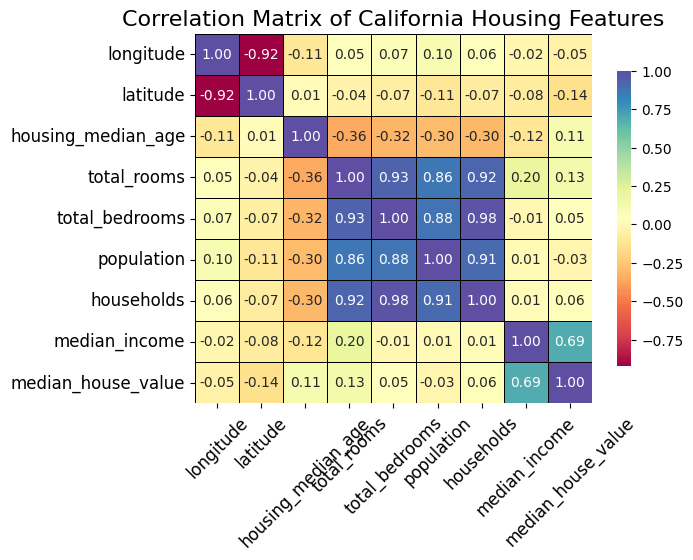

In [24]:
corr_matrix_ca = df_numeric.corr(method='pearson')

sns.heatmap(corr_matrix_ca, annot=True, fmt=".2f", cmap='Spectral', cbar_kws={'shrink': .8}, 
            linewidths=0.5, linecolor='black', annot_kws={"size": 10})

plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Correlation Matrix of California Housing Features', fontsize=16)
plt.show()

In [25]:
df_features_ca = corr_matrix_ca.index[abs(corr_matrix_ca['median_house_value']) > 0.1].to_list()
df_features_ca.remove('median_house_value')
print(df_features_ca)

['latitude', 'housing_median_age', 'total_rooms', 'median_income']


In [26]:
evaluate = MetricEvaluator()

In [27]:
n_experiments = 100
metrics = ['r2', 'mse', 'mae', 'rmse']

y_ca = df_clean['median_house_value']
x_ca = df_clean[df_features_ca]

lr_coverage_counts_ca = {metric: 0 for metric in metrics}
xgb_coverage_counts_ca = {metric: 0 for metric in metrics}

for experiment in range(n_experiments):
    x_train_exp_ca, x_temp_ca, y_train_exp_ca, y_temp_ca = train_test_split(x_ca, y_ca, test_size=0.5, random_state=experiment)
    x_test_exp_ca, x_val_exp_ca, y_test_exp_ca, y_val_exp_ca = train_test_split(x_temp_ca, y_temp_ca, test_size=0.8, random_state=experiment)
    
    scaler_exp_ca = StandardScaler()
    x_train_scaled_ca = scaler_exp_ca.fit_transform(x_train_exp_ca)
    x_test_scaled_ca = scaler_exp_ca.transform(x_test_exp_ca)
    x_val_scaled_ca = scaler_exp_ca.transform(x_val_exp_ca)
    
    lr_model_ca = LinearRegression()
    lr_model_ca.fit(x_train_scaled_ca, y_train_exp_ca)
    y_test_pred_lr_ca = lr_model_ca.predict(x_test_scaled_ca)
    y_val_pred_lr_ca = lr_model_ca.predict(x_val_scaled_ca)
    
    xgb_model_ca = xgb.XGBRegressor(
        objective='reg:linear',
        booster='gblinear',
        n_estimators=100,
        learning_rate=0.1,
        random_state=experiment
    )
    
    xgb_model_ca.fit(x_train_exp_ca, y_train_exp_ca)
    y_test_pred_xgb_ca = xgb_model_ca.predict(x_test_exp_ca)
    y_val_pred_xgb_ca = xgb_model_ca.predict(x_val_exp_ca)
    
    for metric in metrics:
        lr_result_ca = evaluate.evaluate(y_true=y_test_exp_ca, y_pred=y_test_pred_lr_ca, task='regression', metric=metric)
        lr_test_value_ca, (lr_ci_lower_ca, lr_ci_upper_ca) = lr_result_ca
        
        if metric == 'r2':
            lr_val_value_ca = evaluate.r2_score(y_val_exp_ca, y_val_pred_lr_ca, compute_ci=False)
        elif metric == 'mse':
            lr_val_value_ca = evaluate.mse(y_val_exp_ca, y_val_pred_lr_ca, compute_ci=False)
        elif metric == 'mae':
            lr_val_value_ca = evaluate.mae(y_val_exp_ca, y_val_pred_lr_ca, compute_ci=False)
        elif metric == 'rmse':
            lr_val_value_ca = evaluate.rmse(y_val_exp_ca, y_val_pred_lr_ca, compute_ci=False)
        
        if lr_ci_lower_ca <= lr_val_value_ca <= lr_ci_upper_ca:
            lr_coverage_counts_ca[metric] += 1
        
        
        xgb_result_ca = evaluate.evaluate(y_true=y_test_exp_ca, y_pred=y_test_pred_xgb_ca, task='regression', metric=metric)
        xgb_test_value_ca, (xgb_ci_lower_ca, xgb_ci_upper_ca) = xgb_result_ca
        
        if metric == 'r2':
            xgb_val_value_ca = evaluate.r2_score(y_val_exp_ca, y_val_pred_xgb_ca, compute_ci=False)
        elif metric == 'mse':
            xgb_val_value_ca = evaluate.mse(y_val_exp_ca, y_val_pred_xgb_ca, compute_ci=False)
        elif metric == 'mae':
            xgb_val_value_ca = evaluate.mae(y_val_exp_ca, y_val_pred_xgb_ca, compute_ci=False)
        elif metric == 'rmse':
            xgb_val_value_ca = evaluate.rmse(y_val_exp_ca, y_val_pred_xgb_ca, compute_ci=False)
        
        if xgb_ci_lower_ca <= xgb_val_value_ca <= xgb_ci_upper_ca:
            xgb_coverage_counts_ca[metric] += 1

for metric in metrics:
    lr_coverage_rate_ca = (lr_coverage_counts_ca[metric] / n_experiments) * 100
    xgb_coverage_rate_ca = (xgb_coverage_counts_ca[metric] / n_experiments) * 100
    
    print(f"{metric.upper()} - Linear Regression CI Coverage Rate: {lr_coverage_rate_ca:.1f}%")
    print(f"{metric.upper()} - XGBoost CI Coverage Rate: {xgb_coverage_rate_ca:.1f}%")
    print(f"{metric.upper()} - Linear Regression Success: {'Yes' if lr_coverage_rate_ca >= 90 else 'No'}")
    print(f"{metric.upper()} - XGBoost Success: {'Yes' if xgb_coverage_rate_ca >= 90 else 'No'}")
    print()

R2 - Linear Regression CI Coverage Rate: 90.0%
R2 - XGBoost CI Coverage Rate: 92.0%
R2 - Linear Regression Success: Yes
R2 - XGBoost Success: Yes

MSE - Linear Regression CI Coverage Rate: 92.0%
MSE - XGBoost CI Coverage Rate: 93.0%
MSE - Linear Regression Success: Yes
MSE - XGBoost Success: Yes

MAE - Linear Regression CI Coverage Rate: 92.0%
MAE - XGBoost CI Coverage Rate: 94.0%
MAE - Linear Regression Success: Yes
MAE - XGBoost Success: Yes

RMSE - Linear Regression CI Coverage Rate: 92.0%
RMSE - XGBoost CI Coverage Rate: 93.0%
RMSE - Linear Regression Success: Yes
RMSE - XGBoost Success: Yes



In [28]:
x_train_single_ca, x_temp_single_ca, y_train_single_ca, y_temp_single_ca = train_test_split(x_ca, y_ca, test_size=0.5, random_state=42)
x_test_single_ca, x_val_single_ca, y_test_single_ca, y_val_single_ca = train_test_split(x_temp_single_ca, y_temp_single_ca, test_size=0.8, random_state=42)

print(f"Train: {len(x_train_single_ca)}")
print(f"Test: {len(x_test_single_ca)}")
print(f"Validation: {len(x_val_single_ca)}")

scaler_single_ca = StandardScaler()
x_train_single_scaled_ca = scaler_single_ca.fit_transform(x_train_single_ca)
x_test_single_scaled_ca = scaler_single_ca.transform(x_test_single_ca)
x_val_single_scaled_ca = scaler_single_ca.transform(x_val_single_ca)

Train: 10216
Test: 2043
Validation: 8174


In [29]:
lr_single_ca = LinearRegression()
lr_single_ca.fit(x_train_single_scaled_ca, y_train_single_ca)
y_test_pred_lr_single_ca = lr_single_ca.predict(x_test_single_scaled_ca)
y_val_pred_lr_single_ca = lr_single_ca.predict(x_val_single_scaled_ca)

xgb_single_ca = xgb.XGBRegressor(
    objective='reg:linear',
    booster='gblinear',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
xgb_single_ca.fit(x_train_single_ca, y_train_single_ca)
y_test_pred_xgb_single_ca = xgb_single_ca.predict(x_test_single_ca)
y_val_pred_xgb_single_ca = xgb_single_ca.predict(x_val_single_ca)

In [33]:
metrics = ['r2', 'mse', 'mae', 'rmse', 'iou']

for metric in metrics:
    print(f"{metric.upper()} METRIC:")
    
    lr_result_ca = evaluate.evaluate(y_true=y_test_single_ca, y_pred=y_test_pred_lr_single_ca, task='regression', metric=metric)
    lr_test_value_ca, (lr_ci_lower_ca, lr_ci_upper_ca) = lr_result_ca
    
    if metric == 'r2':
        lr_val_actual_ca = evaluate.r2_score(y_val_single_ca, y_val_pred_lr_single_ca, compute_ci=False)
    elif metric == 'mse':
        lr_val_actual_ca = evaluate.mse(y_val_single_ca, y_val_pred_lr_single_ca, compute_ci=False)
    elif metric == 'mae':
        lr_val_actual_ca = evaluate.mae(y_val_single_ca, y_val_pred_lr_single_ca, compute_ci=False)
    elif metric == 'rmse':
        lr_val_actual_ca = evaluate.rmse(y_val_single_ca, y_val_pred_lr_single_ca, compute_ci=False)
    
    print(f"Linear Regression:")
    print(f"  Test {metric}: {lr_test_value_ca:.4f}")
    print(f"  Bootstrap CI: [{lr_ci_lower_ca:.4f}, {lr_ci_upper_ca:.4f}]")
    print(f"  Validation {metric}: {lr_val_actual_ca:.4f}")
    print(f"  Contains: {lr_ci_lower_ca <= lr_val_actual_ca <= lr_ci_upper_ca}")
    print()

R2 METRIC:
Linear Regression:
  Test r2: 0.5191
  Bootstrap CI: [0.4805, 0.5534]
  Validation r2: 0.5179
  Contains: True

MSE METRIC:
Linear Regression:
  Test mse: 6620138457.3470
  Bootstrap CI: [6043095084.8508, 7300545517.3888]
  Validation mse: 6231070613.5439
  Contains: True

MAE METRIC:
Linear Regression:
  Test mae: 59883.0116
  Bootstrap CI: [57548.0964, 62279.6359]
  Validation mae: 59336.7138
  Contains: True

RMSE METRIC:
Linear Regression:
  Test rmse: 81364.2333
  Bootstrap CI: [77789.5054, 85361.4275]
  Validation rmse: 78937.1308
  Contains: True

IOU METRIC:
Linear Regression:
  Test iou: 0.7501
  Bootstrap CI: [0.7416, 0.7584]
  Validation iou: 78937.1308
  Contains: False



In [34]:
for metric in metrics:
    print(f"{metric.upper()} METRIC:")
    
    xgb_result_ca = evaluate.evaluate(y_true=y_test_single_ca, y_pred=y_test_pred_xgb_single_ca, task='regression', metric=metric)
    xgb_test_value_ca, (xgb_ci_lower_ca, xgb_ci_upper_ca) = xgb_result_ca
    
    if metric == 'r2':
        xgb_val_actual_ca = evaluate.r2_score(y_val_single_ca, y_val_pred_xgb_single_ca, compute_ci=False)
    elif metric == 'mse':
        xgb_val_actual_ca = evaluate.mse(y_val_single_ca, y_val_pred_xgb_single_ca, compute_ci=False)
    elif metric == 'mae':
        xgb_val_actual_ca = evaluate.mae(y_val_single_ca, y_val_pred_xgb_single_ca, compute_ci=False)
    elif metric == 'rmse':
        xgb_val_actual_ca = evaluate.rmse(y_val_single_ca, y_val_pred_xgb_single_ca, compute_ci=False)
    elif metric == 'iou':
        xgb_val_actual_ca = evaluate.iou(y_val_single_ca, y_val_pred_xgb_single_ca, compute_ci=False)
    
    print(f"XGBoost:")
    print(f"  Test {metric}: {xgb_test_value_ca:.4f}")
    print(f"  Bootstrap CI: [{xgb_ci_lower_ca:.4f}, {xgb_ci_upper_ca:.4f}]")
    print(f"  Validation {metric}: {xgb_val_actual_ca:.4f}")
    print(f"  Contains: {xgb_ci_lower_ca <= xgb_val_actual_ca <= xgb_ci_upper_ca}")
    print()

R2 METRIC:
XGBoost:
  Test r2: 0.4636
  Bootstrap CI: [0.4321, 0.4946]
  Validation r2: 0.4577
  Contains: True

MSE METRIC:
XGBoost:
  Test mse: 7383994875.5193
  Bootstrap CI: [6803731950.0670, 8025704265.3732]
  Validation mse: 7009346370.3920
  Contains: True

MAE METRIC:
XGBoost:
  Test mae: 65730.1480
  Bootstrap CI: [63440.4211, 68239.9857]
  Validation mae: 65102.6716
  Contains: True

RMSE METRIC:
XGBoost:
  Test rmse: 85930.1744
  Bootstrap CI: [82524.8797, 89686.5820]
  Validation rmse: 83721.8393
  Contains: True

IOU METRIC:
XGBoost:
  Test iou: 0.7308
  Bootstrap CI: [0.7226, 0.7389]
  Validation iou: 0.7292
  Contains: True

